In [158]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
#train['source']='train'
#test['source']='test'
#data = pd.concat([train, test],ignore_index=True)
#print(train.shape, test.shape, data.shape)

In [161]:
#data.apply(lambda x: sum(x.isnull()))

In [162]:
#data.describe()

In [163]:
#data.apply(lambda x: len(x.unique()))

In [164]:
#Filter categorical variables
#categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
#categorical_columns = [x for x in categorical_columns if x not in ['PassengerID','source','Name','Cabin','Ticket']]
#Print frequency of categories
#for col in categorical_columns:
#   print('\nFrequency of Categories for varible '+col)
 #   print(data[col].value_counts())

In [165]:
combine = [train_df, test_df]

In [166]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [167]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
#Numerical: Continous: Age, Fare. Discrete: SibSp, Parch.

In [169]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [170]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"McGovern, Miss. Mary",male,1601,G6,S
freq,1,577,7,4,644


In [171]:
train_df.apply(lambda x: sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [172]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


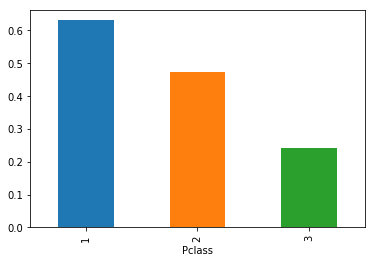

In [173]:
train_df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.show()

In [174]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


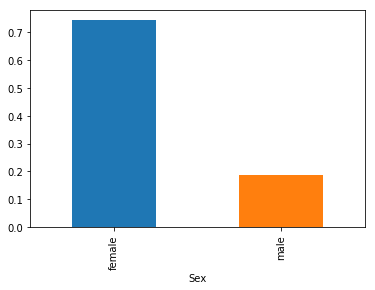

In [175]:
train_df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.show()

In [176]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


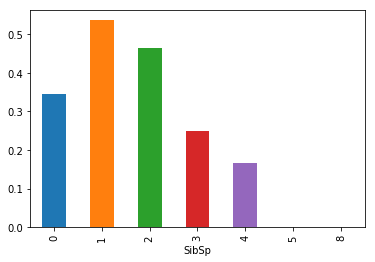

In [177]:
train_df.groupby('SibSp')['Survived'].mean().plot(kind='bar')
plt.show()

In [178]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


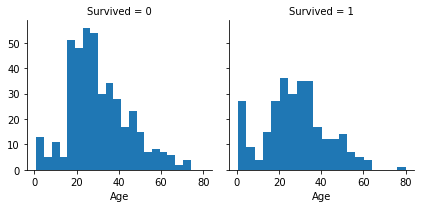

In [179]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

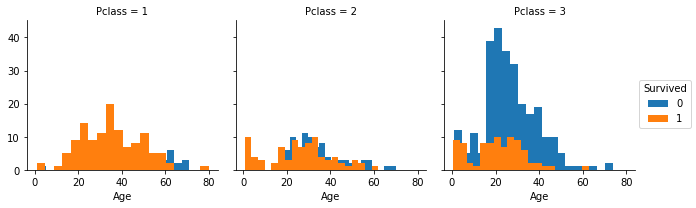

In [180]:
#overlapped
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', bins=20)
grid.add_legend();

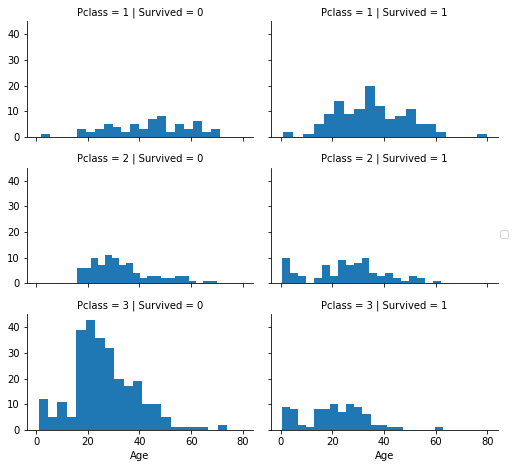

In [181]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=1, bins=20)
grid.add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


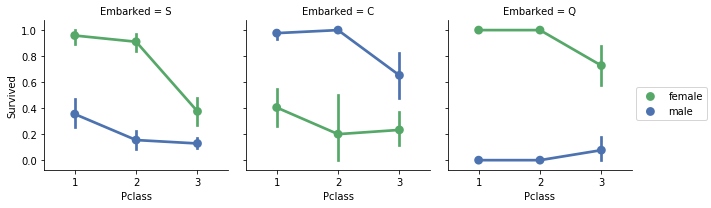

In [182]:
grid = sns.FacetGrid(train_df, col='Embarked')
#grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


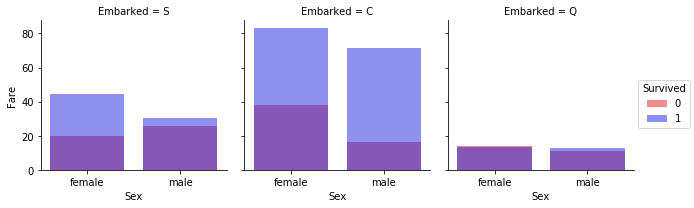

In [183]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'red', 1: 'blue'})
#grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [184]:
#for dataset in combine:
#    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#pd.crosstab(train_df['Title'], train_df['Sex'])

In [185]:
#for dataset in combine:
 #   dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#
 #   dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
  #  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
   # dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
#train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

In [186]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

FINAL = True

In [187]:
p_id = test_df['PassengerId']
data = pd.concat([train_df, test_df])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [188]:
data.drop('PassengerId', axis=1, inplace=True)
survived = data['Survived'].dropna()
data['Survived'].fillna(-1, inplace=True)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [189]:
def one_hot(dataframe, name):
    dataframe = pd.concat([dataframe, pd.get_dummies(dataframe[name])
                           .rename(columns=lambda x: name + str(x))], axis=1)
    return dataframe.drop(name, axis=1)

In [190]:
def preprocess_data(data):
    data['Cabin'].fillna('U0', inplace=True)
    data['CabinSection'] = LabelEncoder().fit_transform(data['Cabin'].map(lambda x: x[0]))
    
    data['CabinDistance'] = data['Cabin'].map(lambda x: x[1:])
    data['CabinDistance'] = data['CabinDistance'].map(lambda x: x.split(' ')[0])
    data['CabinDistance'].where(data['CabinDistance'] != '', '0', inplace=True)
    data['CabinDistance'] = data['CabinDistance'].map(lambda x: int(x))
    data['CabinDistance'] = StandardScaler().fit_transform(data['CabinDistance'].values.reshape(-1, 1))

    data['Sex'] = LabelEncoder().fit_transform(data['Sex'])

    data['Embarked'].fillna('S', inplace=True)
    data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])
    
    data['Name'] = data['Name'].map(lambda x: x.split(',')[1].split('.')[0])
    data['Name'] = LabelEncoder().fit_transform(data['Name'])
    
    data['Fare'].fillna(-1, inplace=True)
    medians = dict()
    for pclass in data['Pclass'].unique():
        median = data.Fare[(data["Fare"] != -1) & (data['Pclass'] == pclass)].median()
        medians[pclass] = median
    for index, row in data.iterrows():
        if row['Fare'] == -1:
            data.loc[index, 'Fare'] = medians[row['Pclass']]
    data['Fare'] = StandardScaler().fit_transform(data['Fare'].values.reshape(-1, 1))
    #data.drop('Fare', axis=1, inplace=True)
    
    data['Age'].fillna(-1, inplace=True)
    medians = dict()
    for title in data['Name'].unique():
        median = data.Age[(data["Age"] != -1) & (data['Name'] == title)].median()
        medians[title] = median
    for index, row in data.iterrows():
        if row['Age'] == -1:
            data.loc[index, 'Age'] = medians[row['Name']]
            
    data['Age'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))
    
    for index, row in data.iterrows():
        ticket = row['Ticket']
        sibsp = row['SibSp']
        parch = row['Parch']

        if sibsp > 0 or parch > 0:
            ages = list()
            for index2, row2 in data[data['Ticket'] == ticket].iterrows():
                ages.append(row2['Age'])
            data.loc[index, 'Age2'] = min(ages)

        else:
            data.loc[index, 'Age2'] = row['Age']
            
    data['Age2'] = StandardScaler().fit_transform(data['Age2'].values.reshape(-1, 1))
    
    died_titles = ('Don', 'Rev', 'Capt', 'Jonkheer')
    survived_titles = ('Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'the Countess')
    data['Title_Died'] = data['Name'].apply(lambda x: int(x in died_titles))
    data['Title_Survived'] = data['Name'].apply(lambda x: int(x in survived_titles))

    for title in ('Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Major', 'Col'):
        data['Title_{}'.format(title)] = data['Name'].apply(lambda x: int(x == title))

    data.drop('Name', axis=1, inplace=True)
    
    #data.drop('Name', axis=1, inplace=True)
    
    #data = one_hot(data, 'CabinSection')
    data = one_hot(data, 'Pclass')
    #data = one_hot(data, 'Embarked')
    
    data.drop('Cabin', axis=1, inplace=True)
    data.drop('Ticket', axis=1, inplace=True)
    
    return data

In [191]:
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


In [192]:
processed_data = preprocess_data(data)

training_data = processed_data[data['Survived'] != -1]
testing_data = processed_data[data['Survived'] == -1]

training_data.drop('Survived', axis=1, inplace=True)
testing_data.drop('Survived', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(training_data, survived, test_size=0.19, random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [193]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

models = [
    #KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(n_estimators=90),
    MLPClassifier(),
    #AdaBoostClassifier(),
    #GaussianNB(),
    #QuadraticDiscriminantAnalysis()
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(score)

0.8235294117647058
0.8117647058823529


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [194]:
#categorical_features_indices = np.where(X.dtypes != np.float)[0] 
#importing library and building model 
#from catboost import CatBoostRegressor model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE') 
#model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

In [195]:
if FINAL:

    models = [
        RandomForestClassifier(n_estimators=100),
        MLPClassifier(),
    ]

    i=1
    for model in models:
        model.fit(training_data, survived)
        prediction = model.predict(testing_data)
        np.savetxt('submission{}.csv'.format(i), prediction, delimiter=",")
        i += 1
    

In [ ]:
data['pred'] = pred1
data.to_csv('data1.csv')